# Model evaluation

A collection of commonly used metrics and visualizations for evaluating the performance of time series forecasting models.

### Contents

* Model evaluation metrics
* Visualizing model forecasts
* Plotting residuals

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

import tshelper as h

plt.style.use("seaborn-whitegrid")

## Load data

In [2]:
# Catalog sales dataset
ts = pd.read_csv("data/catalog_seasfac.csv", usecols=["date", "women"], index_col = "date")
ts = ts["women"]
ts.index = pd.to_datetime(ts.index).to_period("M")

ts.head()

date
1989-01    16578.93
1989-02    18236.13
1989-03    43393.55
1989-04    30908.49
1989-05    28701.58
Freq: M, Name: women, dtype: float64

## Evaluate model performance: Fit and forecast

### Train model

In [3]:
# Train/test split
y = ts
y_train = y[:"1997"]
y_test = y["1998"]

# Instantiate and train model
model = SARIMAX(y_train, exog=None, order=(2,1,2), seasonal_order=(1,1,1,12)).fit()

# Predict and forecast
y_pred = model.predict()
y_fcst = model.forecast(12)

### Model evaluation metrics

In [4]:
# Evaluate on training sample
h.eval_model(y_train, y_pred)

Mean of true values:          39477.2528
Mean of predicted values:     39888.8331
Mean absolute error:          6021.9542
Mean relative error:          0.1525
Root mean squared error:      8411.0263
Coefficient of determination: 0.4718


In [5]:
# Evaluate on test sample
h.eval_model(y_test, y_fcst)

Mean of true values:          50541.5242
Mean of predicted values:     46940.2063
Mean absolute error:          4508.1935
Mean relative error:          0.0892
Root mean squared error:      6191.7576
Coefficient of determination: 0.7596


### Visualize model fit and forecast

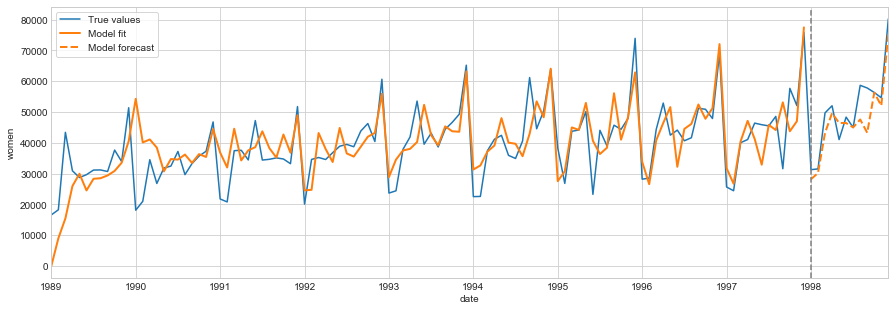

In [6]:
h.plot_model(y, y_pred, y_fcst, xlabel=y.index.name, ylabel=y.name)

### Forecast longer periods to gauge forecast reasonability

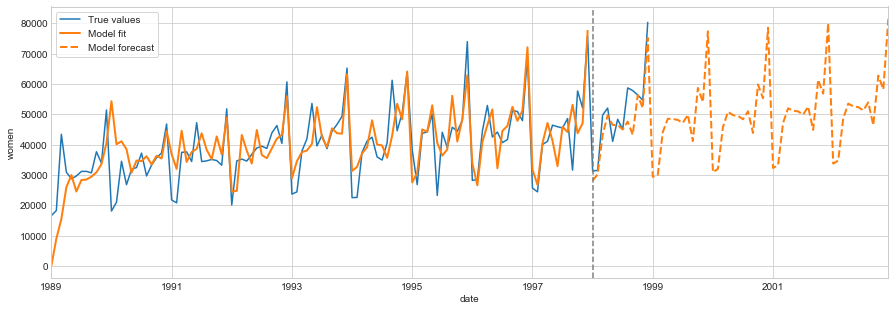

In [7]:
h.plot_model(y, model.predict(), model.forecast(60), xlabel=y.index.name, ylabel=y.name)

## Plotting residuals

* Residuals should show no clear pattern over time (that has not been captured by a model)
* The kernel density estimate of residuals should be centered around zero and look like a normal distribution

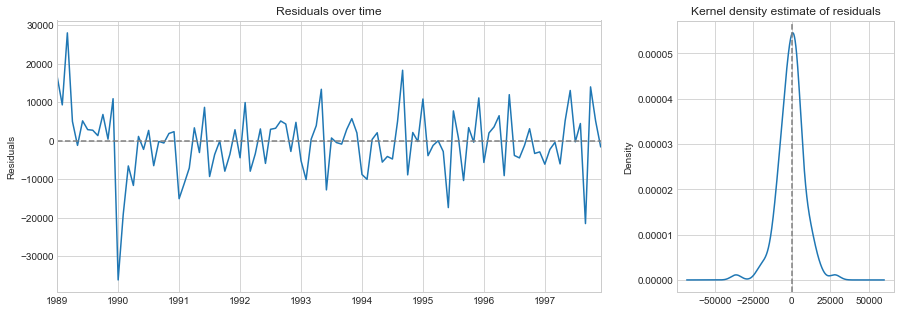

In [9]:
# Calculate residuals
residuals = (y_train - y_pred)

# Plot residuals
h.plot_residuals(residuals=residuals)